In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Visualizamos el dataset:

In [2]:
df = pd.read_csv('../data/winequality_white.csv', sep=';')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head(10)

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [17]:
# Duplicamos para las caracteristicas desceiptivas
df2 = pd.read_csv('../data/winequality_white.csv', sep=';')

Identificación y eliminación de valores duplicados

In [3]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 937


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Filtrar y mostrar filas duplicadas
duplicados_df = df[duplicados]
print(duplicados_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free sulfur dioxide  

Según la descripción de las características del dataset, es posible que algunos vinos tengan exactamente las mismas propiedades físico-químicas y, por lo tanto, aparezcan como duplicados en el dataset.

1. ¿Por qué podrían repetirse los valores?

Muestras duplicadas en el análisis:

Es posible que el mismo vino se haya medido más de una vez (por ejemplo, en distintos momentos o laboratorios) y todas las mediciones resultaron iguales.

Vinos distintos con propiedades idénticas:
Dos vinos producidos en diferentes lotes o bodegas podrían tener propiedades químicas y niveles de calidad idénticos.

Errores en la recopilación de datos:
Si el dataset proviene de un experimento o una base de datos consolidada, podrían haberse incluido filas duplicadas por error.

2. Mantener los duplicados podría causar un sesgo en el entrenamiento del modelo, ya que observaciones idénticas tendrían más peso que otras. Esto haría que el modelo dé más importancia a esas combinaciones de características de lo que debería.

3. Conclusion:
Dado que el objetivo es predecir la calidad del vino utilizando modelos de clasificación, he decidido eliminar los duplicados. Esto asegura que cada combinación única de características contribuya de manera justa al entrenamiento del modelo.

In [5]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Verificación y ajuste de tipos de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [7]:
# Convertir la columna `quality` a tipo categórico
df['quality'] = df['quality'].astype('category')
print(df.dtypes)

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object


Corrección de inconsistencias en valores categóricos:

In [8]:
columnas_categoricas = ['quality']
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}':")
    print(df[columna].unique())
    print("\n")

Valores únicos en 'quality':
[6, 5, 7, 8, 4, 3, 9]
Categories (7, int64): [3, 4, 5, 6, 7, 8, 9]




Por lo que se observa, los valores únicos de la columna quality son [6, 5, 7, 8, 4, 3, 9], y corresponden a categorías ordinales que parecen estar dentro de un rango razonable para evaluar la calidad del vino (generalmente en una escala de 0 a 10).

Manejo de valores faltantes adecuadamente:

In [9]:
print("Valores faltantes después de imputar:")
print(df.isnull().sum())

Valores faltantes después de imputar:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Exploracion de datos:

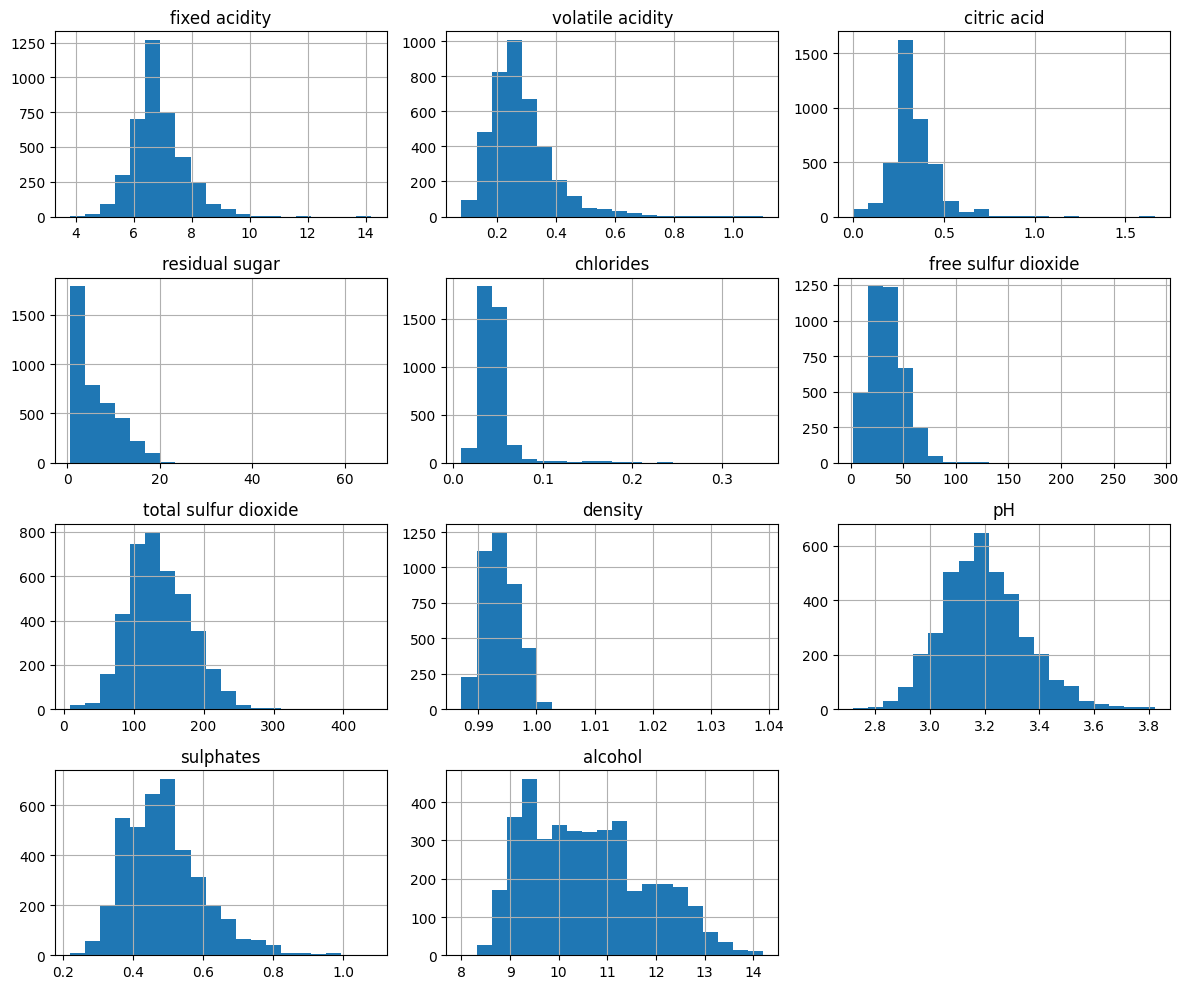

In [ ]:
# Histograma para cada característica
df.drop(columns='quality').hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

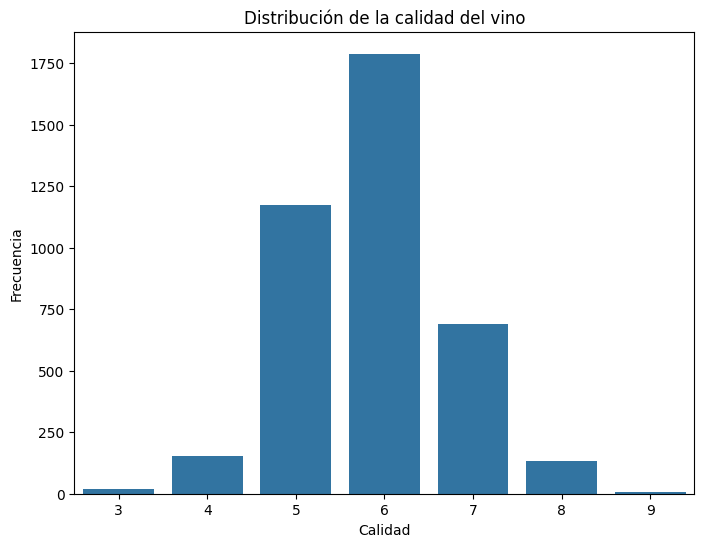

In [11]:
# Quality

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

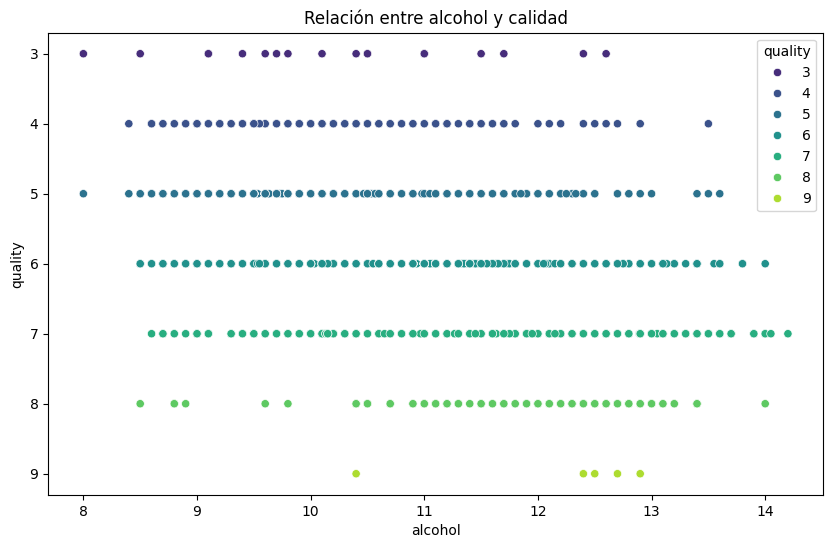

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality', palette='viridis')
plt.title('Relación entre alcohol y calidad')
plt.show()

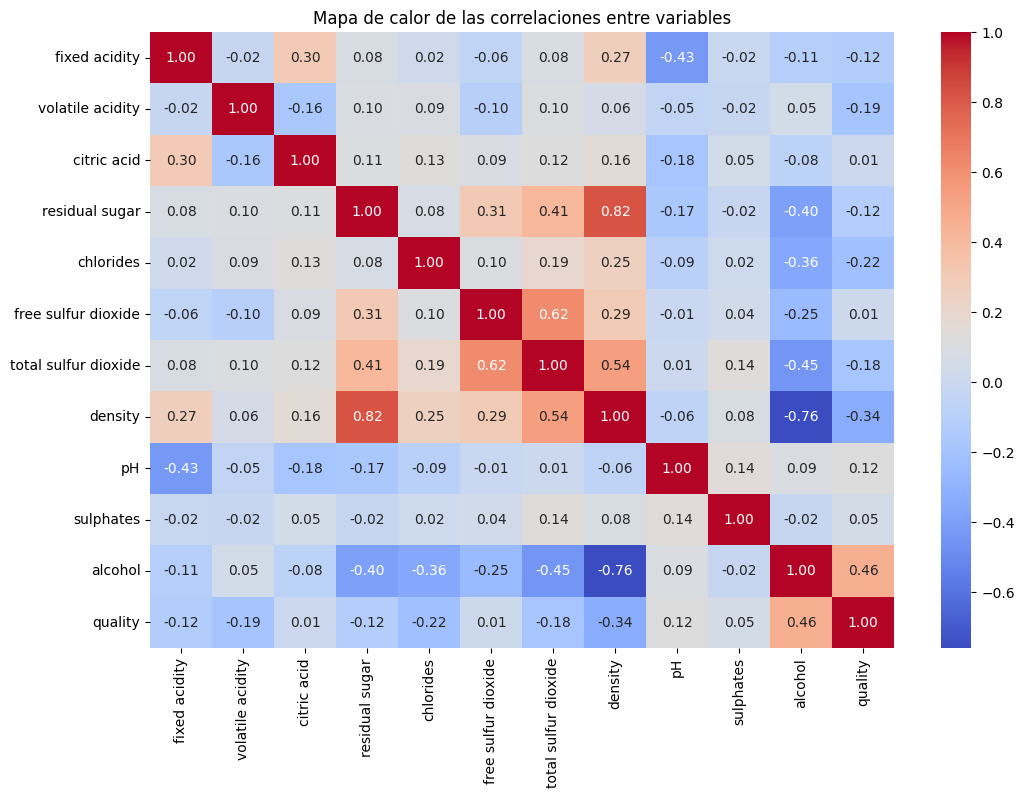

In [14]:
# Correlaciones entre variables
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de calor de las correlaciones entre variables')
plt.show()

Estadisticas descriptivas:

In [ ]:
# Estadísticas descriptivas
estadisticas = df.describe()

# Medidas adicionales
media = df2.mean()
mediana = df2.median()
moda = df.mode().iloc[0]
desviacion_estandar = df2.std()
print(estadisticas)
print(f"\nMedia:\n{media}")
print(f"\nMediana:\n{mediana}")
print(f"\nModa:\n{moda}")
print(f"\nDesviación estándar:\n{desviacion_estandar}")


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000         

Implementación de Modelos de Clasificación

In [ ]:
# Características (X) y variable objetivo (y)
X = df.drop(columns='quality')
y = df['quality']

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log_reg = log_reg.predict(X_test)

# Evaluación del modelo
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.49558638083228246
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        30
           5       0.54      0.52      0.53       234
           6       0.49      0.72      0.58       349
           7       0.41      0.14      0.21       145
           8       0.00      0.00      0.00        30

    accuracy                           0.50       793
   macro avg       0.24      0.23      0.22       793
weighted avg       0.45      0.50      0.45       793



c:\Users\Belen Lugo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test)

# Evaluación del modelo
print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN):
Accuracy: 0.42118537200504413
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.17      0.10      0.12        30
           5       0.40      0.51      0.45       234
           6       0.46      0.55      0.50       349
           7       0.32      0.13      0.19       145
           8       0.00      0.00      0.00        30

    accuracy                           0.42       793
   macro avg       0.23      0.22      0.21       793
weighted avg       0.39      0.42      0.39       793



In [ ]:
# Comparación de métricas
# Métricas para Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

# Métricas para KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\nComparación de Modelos:")
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")

print(f"Logistic Regression Recall: {recall_log_reg:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")

print(f"Logistic Regression F1-Score: {f1_log_reg:.4f}")
print(f"KNN F1-Score: {f1_knn:.4f}")



Comparación de Modelos:
Logistic Regression Accuracy: 0.4956
KNN Accuracy: 0.4212
Logistic Regression Precision: 0.4489
KNN Precision: 0.3877
Logistic Regression Recall: 0.4956
KNN Recall: 0.4212
Logistic Regression F1-Score: 0.4512
KNN F1-Score: 0.3932


### Conclusión

Logistic Regression tiene un mejor desempeño en todas las métricas clave (precisión, recall y F1-score), lo que lo hace el modelo preferido en este caso. Aunque su accuracy sigue siendo baja, es más efectivo que KNN, que tiene un rendimiento inferior en todas las métricas.

Logistic Regression es adecuado para este problema debido a la relación lineal entre las características y la variable objetivo, mientras que KNN puede verse afectado por la escala de los datos y la selección de vecinos.